In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [29]:
# Study data files
nba_salaries_path = "NBA_Salaries.csv"
wnba_salaries_path = "WNBA_salaries.csv"

In [30]:
# Read the mouse data and the study results
nba_salaries = pd.read_csv(nba_salaries_path)
wnba_salaries = pd.read_csv(wnba_salaries_path)

In [31]:
nba_salaries.columns

Index(['Year', 'Team ', 'Player', ' Salary ', ' Incentative '], dtype='object')

In [32]:
nba_salaries["Salary"] = nba_salaries[" Salary "].str.replace(",","")

In [33]:
nba_salaries["Salary"] = nba_salaries["Salary"].str.replace("$","")

C:\Users\marye\AppData\Local\Temp\ipykernel_3312\4281388950.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba_salaries["Salary"] = nba_salaries["Salary"].str.replace("$","")


In [34]:
nba_salaries.dtypes

Year              int64
Team             object
Player           object
 Salary          object
 Incentative     object
Salary           object
dtype: object

In [35]:
nba_salaries["Salary"] = nba_salaries["Salary"].astype(float)

In [36]:
nba_salaries.dtypes

Year               int64
Team              object
Player            object
 Salary           object
 Incentative      object
Salary           float64
dtype: object

In [37]:
top_eighteen_best_paid_nba = nba_salaries.sort_values(by = "Salary", ascending = False)[:18]
top_eighteen_best_paid_nba

,Year,Team,Player,Salary,Incentative,Salary
15,2023,Golden State Warriors,Stephen Curry,"$51,915,615.00",NaN,51915615
65,2022,Golden State Warriors,Stephen Curry,"$48,070,014.00",NaN,48070014
25,2023,LA Lakers,LeBron James,"$47,607,350.00",NaN,47607350
45,2023,Phoenix Suns,Bradley Beal,"$46,741,590.00",NaN,46741590
46,2023,Phoenix Suns,Kevin Durant,"$46,407,433.00","$1,242,000.00",46407433
115,2021,Golden State Warriors,Stephen Curry,"$45,780,966.00",NaN,45780966
75,2022,LA Lakers,LeBron James,"$44,474,988.00",NaN,44474988
125,2021,LA Lakers,Russell Westbrook,"$44,211,146.00",NaN,44211146
16,2023,Golden State Warriors,Klay Thompson,"$43,219,440.00",NaN,43219440
165,2020,Golden State Warriors,Stephen Curry,"$43,006,362.00",NaN,43006362


In [38]:
top_ten_best_paid_nba = top_eighteen_best_paid_nba.drop_duplicates(["Player"])

In [39]:
x_axis = np.arange(0, len(top_ten_best_paid_nba["Player"]))

In [40]:
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
Player = top_ten_best_paid_nba['Player']
Player

15         Stephen Curry
25          LeBron James
45          Bradley Beal
46          Kevin Durant
125    Russell Westbrook
16         Klay Thompson
195           Chris Paul
30           Rudy Gobert
26         Anthony Davis
0             Trae Young
Name: Player, dtype: object

In [42]:
Salary = top_ten_best_paid_nba['Salary']

## NBA Summary Stats

In [43]:
mean = nba_salaries.groupby('Year')['Salary'].mean()
mean

Year
2019   18486721
2020   17207762
2021   18596450
2022   23176001
2023   24584308
Name: Salary, dtype: float64

In [44]:
median = nba_salaries.groupby('Year')['Salary'].median()
median

Year
2019   17100000
2020   14937500
2021   17142857
2022   21261364
2023   20795500
Name: Salary, dtype: float64

In [45]:
variance = nba_salaries.groupby('Year')['Salary'].var()
pd.options.display.float_format = '{:.0f}'.format
variance

Year
2019    82463923941902
2020   104962506244868
2021   114300422660927
2022   137196495921147
2023   150999420574197
Name: Salary, dtype: float64

In [46]:
std = nba_salaries.groupby('Year')['Salary'].std()
pd.options.display.float_format = '{:.0f}'.format
std

Year
2019    9080965
2020   10245121
2021   10691138
2022   11713091
2023   12288182
Name: Salary, dtype: float64

In [47]:
sem = nba_salaries.groupby('Year')['Salary'].sem()
sem

Year
2019   1284242
2020   1448879
2021   1511955
2022   1656481
2023   1737811
Name: Salary, dtype: float64

In [48]:
summary_stats = nba_salaries.groupby('Year')['Salary'].agg(['mean', 'median', 'var', 'std','sem'])
display(summary_stats)

,mean,median,var,std,sem
Year,,,,,
2019,18486721,17100000,82463923941902,9080965,1284242
2020,17207762,14937500,104962506244868,10245121,1448879
2021,18596450,17142857,114300422660927,10691138,1511955
2022,23176001,21261364,137196495921147,11713091,1656481
2023,24584308,20795500,150999420574197,12288182,1737811


## NBA Graphs

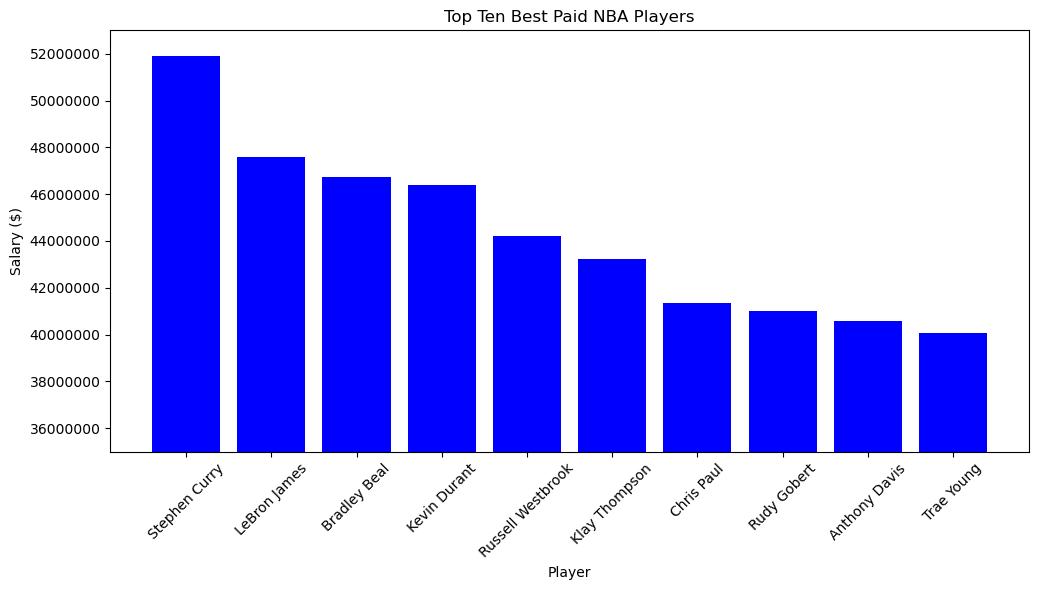

In [49]:
#top_ten_best_paid_nba = nba_salaries.sort_values(by = "Salary", ascending = False)[:10]

plt.figure(figsize=(10,6))
plt.bar(x_axis, Salary, facecolor = "blue")
plt.title("Top Ten Best Paid NBA Players")
plt.xlabel("Player")
plt.xticks(x_axis,Player,rotation=45)
plt.ylim(35e6,53e6)
plt.ylabel("Salary ($)")

plt.tight_layout()
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.savefig("graph_outputs/TopTen_NBA.png")
plt.show()

In [50]:
top_ten_best_paid_nba.index.values

array([ 15,  25,  45,  46, 125,  16, 195,  30,  26,   0], dtype=int64)

In [51]:
df = nba_salaries.describe()
df["Salary"]

count        250
mean    20410248
std     11161845
min      2964840
25%     11080125
50%     18000000
75%     27450000
max     51915615
Name: Salary, dtype: float64

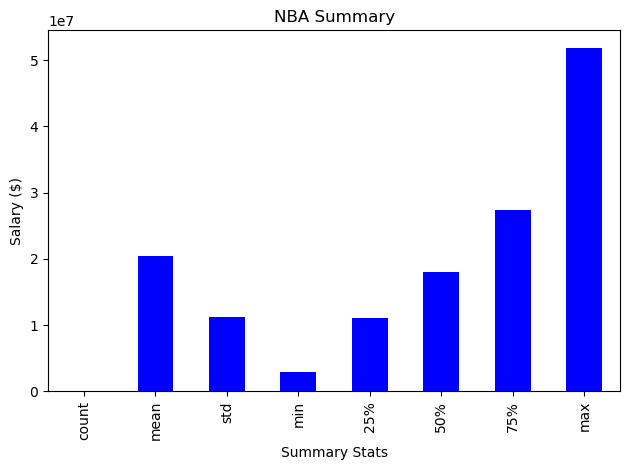

In [52]:
df['Salary'].plot(kind = "bar", color = "blue")

plt.title("NBA Summary")
plt.xlabel("Summary Stats")
#plt.xticks(wnba_x_axis,wnba_player,rotation=45)
#plt.ylim(210000,236000)
plt.ylabel("Salary ($)")
plt.tight_layout()

plt.savefig("graph_outputs/NBA_summary.png")
plt.show()

## WNBA Summary Stats

In [53]:
wnba_salaries.dtypes

Year       int64
Team      object
Player    object
Salary    object
Bonus     object
dtype: object

In [54]:
wnba_salaries.columns

Index(['Year', 'Team ', 'Player', 'Salary', 'Bonus'], dtype='object')

In [55]:
wnba_salaries = wnba_salaries.rename(columns=str.strip)

In [56]:
wnba_salaries

,Year,Team,Player,Salary,Bonus
0,2023,Atlanta Dream,Cheyenne Parker,"$196,100.00",NaN
1,2023,Atlanta Dream,Allisha Gray,"$169,600.00","$25,000.00"
2,2023,Atlanta Dream,Danielle Robinson,"$155,000.00",NaN
3,2023,Atlanta Dream,Monique Billings,"$145,000.00",NaN
4,2023,Atlanta Dream,Nia Coffey,"$130,000.00",NaN
...,...,...,...,...,...
245,2019,Seattle Storm,Sue Bird,"$117,500.00",NaN
246,2019,Seattle Storm,Jewell Loyd,"$117,500.00",NaN
247,2019,Seattle Storm,Natasha Howard,"$115,000.00",NaN
248,2019,Seattle Storm,Courtney Paris,"$111,000.00",NaN


In [57]:
wnba_salaries.dtypes

Year       int64
Team      object
Player    object
Salary    object
Bonus     object
dtype: object

In [58]:
#wnba_salaries["Salary"] = wnba_salaries[" Salary "].str.replace(",","")

In [59]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace("$","")

C:\Users\marye\AppData\Local\Temp\ipykernel_3312\941997773.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace("$","")


In [60]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace(",","")

In [61]:
#wnba_salaries.dtypes

In [62]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].astype(float)

In [63]:
wnba_salaries.dtypes

Year        int64
Team       object
Player     object
Salary    float64
Bonus      object
dtype: object

In [64]:
wnba_salaries.sample(10)

,Year,Team,Player,Salary,Bonus
111,2021,Dallas Wings,Allisha Gray,160000,NaN
76,2022,Las Vegas Aces,A'ja Wilson,196267,NaN
52,2022,Atlanta Dream,Erica Wheeler,185400,NaN
125,2021,Las Vegas Aces,Liz Cambage,221450,NaN
74,2022,Los Angeles Sparks,Brittney Sykes,113300,NaN
186,2020,New York Liberty,Layshia Claredon,120000,NaN
46,2023,Seattle Storm,Mercedes Russell,160000,NaN
183,2020,Minnesota Lynx,Shenise Johnson,106000,NaN
162,2020,Dallas Wings,Isabelle Harrison,150000,NaN
50,2022,Atlanta Dream,Tiffany Hayes,215000,NaN


In [65]:
mean = wnba_salaries.groupby('Year')['Salary'].mean()
mean

Year
2019   109442
2020   139384
2021   160684
2022   164109
2023   172356
Name: Salary, dtype: float64

In [66]:
median = wnba_salaries.groupby('Year')['Salary'].median()
median

Year
2019   115000
2020   119500
2021   175000
2022   160000
2023   169250
Name: Salary, dtype: float64

In [67]:
variance = wnba_salaries.groupby('Year')['Salary'].var()
variance

Year
2019    151712901
2020   1694563088
2021   1907347395
2022   1996420817
2023   1445142210
Name: Salary, dtype: float64

In [68]:
std = wnba_salaries.groupby('Year')['Salary'].std()
std

Year
2019   12317
2020   41165
2021   43673
2022   44681
2023   38015
Name: Salary, dtype: float64

In [69]:
sem = wnba_salaries.groupby('Year')['Salary'].sem()
sem

Year
2019   1742
2020   5822
2021   6176
2022   6319
2023   5376
Name: Salary, dtype: float64

In [70]:
wnba_summary_stats = wnba_salaries.groupby('Year')['Salary'].agg(['mean', 'median', 'var', 'std','sem'])
wnba_summary_stats

,mean,median,var,std,sem
Year,,,,,
2019,109442,115000,151712901,12317,1742
2020,139384,119500,1694563088,41165,5822
2021,160684,175000,1907347395,43673,6176
2022,164109,160000,1996420817,44681,6319
2023,172356,169250,1445142210,38015,5376


## WNBA Graphs

In [71]:
best_paid_wnba = wnba_salaries.sort_values(by = "Salary", ascending = False)[:20]
best_paid_wnba

,Year,Team,Player,Salary,Bonus
45,2023,Seattle Storm,Jewell Loyd,234936,NaN
40,2023,Phoenix Mercury,Diana Taurasi,234936,NaN
10,2023,Dallas Wings,Arike Ogunbowale,234936,NaN
41,2023,Phoenix Mercury,Skylar Diggins-Smith,234350,NaN
90,2022,Phoenix Mercury,Diana Taurasi,228094,NaN
95,2022,Seattle Storm,Jewell Loyd,228094,NaN
96,2022,Seattle Storm,Breanna Stewart,228094,NaN
91,2022,Phoenix Mercury,Skylar Diggins-Smith,227900,NaN
92,2022,Phoenix Mercury,Brittney Griner,227900,NaN
11,2023,Dallas Wings,Natasha Howard,227900,NaN


In [72]:
wnba_top_ten = best_paid_wnba.drop_duplicates(["Player"])
display(wnba_top_ten)

,Year,Team,Player,Salary,Bonus
45,2023,Seattle Storm,Jewell Loyd,234936,NaN
40,2023,Phoenix Mercury,Diana Taurasi,234936,NaN
10,2023,Dallas Wings,Arike Ogunbowale,234936,NaN
41,2023,Phoenix Mercury,Skylar Diggins-Smith,234350,NaN
96,2022,Seattle Storm,Breanna Stewart,228094,NaN
92,2022,Phoenix Mercury,Brittney Griner,227900,NaN
11,2023,Dallas Wings,Natasha Howard,227900,NaN
125,2021,Las Vegas Aces,Liz Cambage,221450,NaN
145,2021,Seattle Storm,Sue Bird,221450,NaN
50,2022,Atlanta Dream,Tiffany Hayes,215000,NaN


In [73]:
wnba_x_axis = np.arange(0, len(wnba_top_ten["Player"]))

In [74]:
wnba_player = wnba_top_ten["Player"]

In [75]:
wnba_salary = wnba_top_ten['Salary']

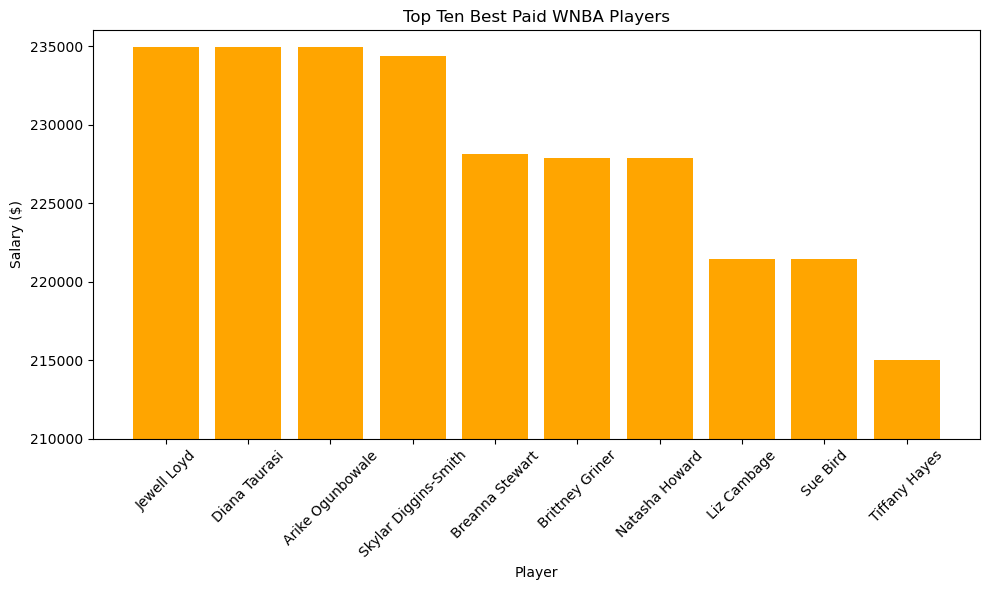

In [76]:
plt.figure(figsize=(10,6))
plt.bar(wnba_x_axis, wnba_salary, facecolor = "orange")
plt.title("Top Ten Best Paid WNBA Players")
plt.xlabel("Player")
plt.xticks(wnba_x_axis,wnba_player,rotation=45)
plt.ylim(210000,236000)
plt.ylabel("Salary ($)")
plt.tight_layout()

plt.savefig("graph_outputs/TopTen_WNBA.png")
plt.show()

In [77]:
df2 = wnba_salaries.describe()
df2

,Year,Salary
count,250,250
mean,2021,149195
std,1,43948
min,2019,64538
25%,2020,115000
50%,2021,145000
75%,2022,190375
max,2023,234936


In [78]:
df3 = df2["Salary"]

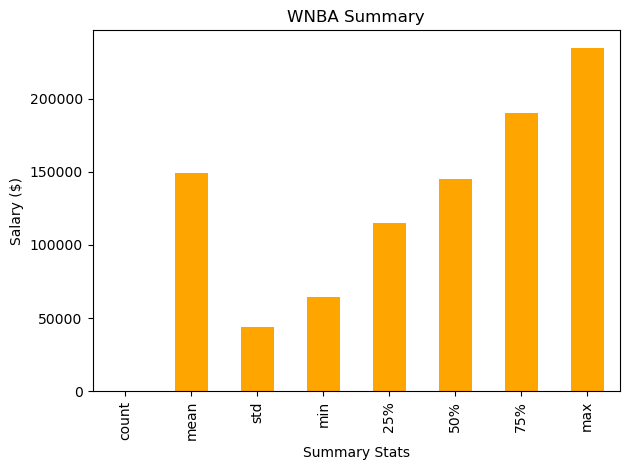

In [80]:
#df2['Salary'].plot(kind = "bar", color = "orange")
df3.plot(kind = "bar", color = "orange")
plt.title("WNBA Summary")
plt.xlabel("Summary Stats")
#plt.xticks(wnba_x_axis,wnba_player,rotation=45)
#plt.ylim(210000,236000)
plt.ylabel("Salary ($)")
plt.tight_layout()
#fig, ax = plt.subplots()
#bar_container = ax.par(wnba_salaries.describe(),df2["Salary"])
#ax.bar_label(bar_container, fmt='{:, .0f}')
#for i, v in enumerate(df2["Salary"]):
    #ax.text(i,v + 10000, str(v), ha="center", va="bottom")

plt.savefig("graph_outputs/WNBA_summary.png")
plt.show()

## NBA and WNB Graphs

In [81]:
nba_vs_wnba = pd.DataFrame({"nba": df['Salary'],
                           "wnba": df2['Salary']
                        })
nba_vs_wnba

,nba,wnba
count,250,250
mean,20410248,149195
std,11161845,43948
min,2964840,64538
25%,11080125,115000
50%,18000000,145000
75%,27450000,190375
max,51915615,234936


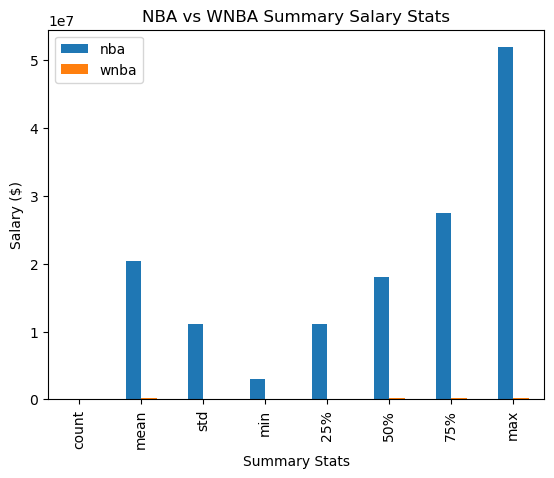

In [83]:
nba_vs_wnba.plot(kind = "bar")
plt.title("NBA vs WNBA Summary Salary Stats")
plt.xlabel("Summary Stats")
plt.ylabel("Salary ($)")
plt.savefig("graph_outputs/NBAvsWNBA1.png")